In [2]:

import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt
from iwopy.interfaces.pymoo import Optimizer_pymoo

from iwopy import LocalFD
from iwopy.optimizers import GG

import foxes
import foxes.variables as FV
from foxes.opt.problems.layout import FarmLayoutOptProblem
from foxes.opt.constraints import FarmBoundaryConstraint, MinDistConstraint, AreaGeometryConstraint
from foxes.opt.objectives import MaxFarmPower
from foxes.opt.objectives import MaxNTurbines  

import foxes.opt.problems.layout.geom_layouts as grg      # Purely geometrical layout problems (wake effects are not evaluated).
# to include Wake effect look up: https://fraunhoferiwes.github.io/foxes.docs/api_opt_problems.html#foxes-opt-problems-layout

from iwopy.interfaces.pymoo import Optimizer_pymoo        # some optimization Package idk
import geopandas as gpd



In [3]:
## get timeseries-data (here ERA5 as example)-------
from ERA5 import load_data,calculate_wind_speed,calculate_wind_direction,calculate_averages,check_data_gaps

Era5_path = 'data/reanalysis'  
start_year = 2000
end_year = 2001
    
Era5_data = load_data(Era5_path, start_year, end_year)
Era5_data = calculate_wind_speed(Era5_data)
Era5_data = calculate_wind_direction(Era5_data)
##--------------------------------------------------
data = Era5_data
 
#print(type(data))  
data.columns

c:\Advanced Programming\Project\StudentProject-Yield-Predictions-Offshore\ERA5.py:62: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=Era5_data.index.min(), end=Era5_data.index.max(), freq='H')


Data Availability is 99.97%
Missing time periods are:
DatetimeIndex(['2023-02-26 00:00:00', '2023-02-26 01:00:00',
               '2023-02-26 02:00:00', '2023-02-26 03:00:00',
               '2023-02-26 04:00:00', '2023-02-26 05:00:00',
               '2023-02-26 06:00:00', '2023-02-26 07:00:00',
               '2023-02-26 08:00:00', '2023-02-26 09:00:00',
               '2023-02-26 10:00:00', '2023-02-26 11:00:00',
               '2023-02-26 12:00:00', '2023-02-26 13:00:00',
               '2023-02-26 14:00:00', '2023-02-26 15:00:00',
               '2023-02-26 16:00:00', '2023-02-26 17:00:00',
               '2023-02-26 18:00:00', '2023-02-26 19:00:00',
               '2023-02-26 20:00:00', '2023-02-26 21:00:00',
               '2023-02-26 22:00:00', '2023-02-26 23:00:00',
               '2023-02-27 00:00:00', '2023-02-27 01:00:00',
               '2023-02-27 02:00:00', '2023-02-27 03:00:00',
               '2023-02-27 04:00:00', '2023-02-27 05:00:00',
               '2023-02-27 06:0

Index(['Time [UTC]', 'u100', 'v100', 'u10', 'v10', 'WS100', 'WS10', 'WD100',
       'WD10'],
      dtype='object')

In [4]:
# Set Boundary
site_shp = gpd.read_file('data/shapefiles/FEP2024_PreDraft/site.shp')
row = site_shp['name_fep']
# print(type(site_shp[site_shp['name_fep']=='N-9.1']))
# print((site_shp[site_shp['name_fep']=='N-9.1']).shape)
GEO_DF = pd.concat([site_shp[row=='N-9.1'] , site_shp[row=='N-9.2'] , site_shp[row=='N-9.3']], ignore_index=True)
#print(GEO_DF.get_coordinates())

boundary = foxes.utils.geom2d.ClosedPolygon(
        np.array(site_shp[row=='N-9.1'].get_coordinates())
    )

foxes.utils.geom2d.ClosedPolygon

foxes.utils.geom2d.polygon.ClosedPolygon

In [6]:
# generate a geometric Layout 
from NoWake_Layout import NoWake_Layout

D=100   # we should set this as dependent of the Turb_type
n=100 #
pop_size = 10
n_gen = 2

# ?? how do I get the Machine to stop, when it should be done
#NoWake_Layout(boundary,n,D,pop_size,n_gen)
# boundary: the geometric Layout in wich to place the turbines , Foxes - class object
# n :       number of Turbines , int
# D :       Rotor Diameter , int
# pop_size: size of Popolation, int
# n_gen:    numer of generations, int

## Optimze the Layout considering Wake effects

In [7]:
# initialize Model_book
mbook = foxes.models.ModelBook()
ttype = foxes.models.turbine_types.PCtFile("NREL-5MW-D126-H90.csv")
mbook.turbine_types[ttype.name] = ttype

farm = foxes.WindFarm(boundary=boundary)

# read files in path to dataframe and put's those in list 
foxes.input.farm_layout.add_from_df(
    farm, 
    pd.read_csv("NoWake_Layout.csv"),
    turbine_models=[ttype.name]
    ) # also prints Turbines 'Turbine 0, T0: '



Turbine 0, T0: NREL-5MW
Turbine 1, T1: NREL-5MW
Turbine 2, T2: NREL-5MW
Turbine 3, T3: NREL-5MW
Turbine 4, T4: NREL-5MW
Turbine 5, T5: NREL-5MW
Turbine 6, T6: NREL-5MW
Turbine 7, T7: NREL-5MW
Turbine 8, T8: NREL-5MW
Turbine 9, T9: NREL-5MW
Turbine 10, T10: NREL-5MW
Turbine 11, T11: NREL-5MW
Turbine 12, T12: NREL-5MW
Turbine 13, T13: NREL-5MW
Turbine 14, T14: NREL-5MW
Turbine 15, T15: NREL-5MW
Turbine 16, T16: NREL-5MW
Turbine 17, T17: NREL-5MW
Turbine 18, T18: NREL-5MW
Turbine 19, T19: NREL-5MW
Turbine 20, T20: NREL-5MW
Turbine 21, T21: NREL-5MW
Turbine 22, T22: NREL-5MW
Turbine 23, T23: NREL-5MW
Turbine 24, T24: NREL-5MW
Turbine 25, T25: NREL-5MW
Turbine 26, T26: NREL-5MW
Turbine 27, T27: NREL-5MW
Turbine 28, T28: NREL-5MW
Turbine 29, T29: NREL-5MW
Turbine 30, T30: NREL-5MW
Turbine 31, T31: NREL-5MW
Turbine 32, T32: NREL-5MW
Turbine 33, T33: NREL-5MW
Turbine 34, T34: NREL-5MW
Turbine 35, T35: NREL-5MW
Turbine 36, T36: NREL-5MW
Turbine 37, T37: NREL-5MW
Turbine 38, T38: NREL-5MW
Turbin

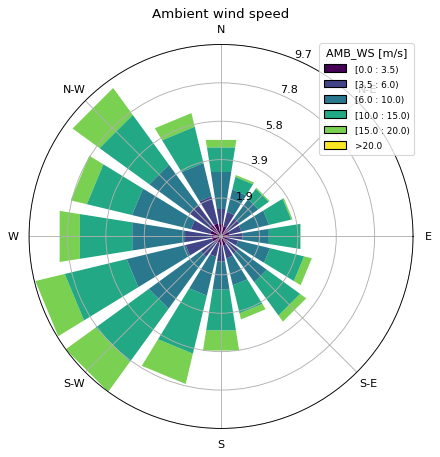

In [8]:
# 2. create the states object and have a look at the wind rose, look at input States 
#    Wind and other atmospheric inflow conditions are called `States`
states = foxes.input.states.Timeseries(                           # StatesTable for panda df or pd readable file (single height)
    data_source = data ,                                           # the data
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "WS100", FV.WD: "WD100", FV.TI: "ti"}, # Mapping from variable names to data column names

    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  # ?? what is TI ?? sometimes also 0.08
)
# Plot windrose
o = foxes.output.StatesRosePlotOutput(states, point=[0., 0., 100.])
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

In [11]:
min_dist = 3*D

# add Turbines as row
# foxes.input.farm_layout.add_row(
#     farm=farm,
#     xy_base=np.array([500.0, 500.0]),
#     xy_step=np.array([50.0, 50.0]),
#     n_turbines=20,
#     turbine_models=[ttype.name],
# )

algo = foxes.algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah025_quadratic_k002"],
    wake_frame="rotor_wd",
    partial_wakes=None,
    mbook=mbook,
    verbosity=0,
)

algo.all_models(with_states=True)

[Timeseries(),
 CentreRotor(),
 BasicFarmController(),
 RotorWD(),
 Bastankhah2014(ws_quadratic, induction=Madsen, k=0.02),
 PartialAxiwake(n=6)]

In [ ]:


with foxes.utils.runners.DaskRunner(
    scheduler='threads',
    n_workers=20,
    threads_per_worker=4,
    progress_bar=False,   # you can't see convergence with this, stupid
    verbosity=1,
) as runner:
    ###--------------------------The_Problem------------------------------###
    problem = FarmLayoutOptProblem("layout_opt", algo, runner=runner)
    problem.add_objective(MaxFarmPower(problem))
    
    #problem.add_objective(MaxNTurbines(problem))  #to max unmber of turbines
    
    
    # problem.add_constraint(AreaGeometryConstraint(
    #     problem,
    #     geometry = boundary,
    #     name = "steve"
    #     ))
    problem.add_constraint(FarmBoundaryConstraint(problem,name='boundary'))

    # if min_dist is not None:
    #      problem.add_constraint(
    #         MinDistConstraint(problem, min_dist=min_dist, min_dist_unit="D")
    #     )
        
    problem.initialize()
    ###--------------------------------------------------------------------###
    
    solver = Optimizer_pymoo(
        problem,
        problem_pars=dict(
            vectorize=not "store_true",
        ),
        algo_pars=dict(
            type="GA",
            pop_size=10,
            seed=42,
        ),
        setup_pars=dict(),
        term_pars=dict(
            type="default",
            n_max_gen=50,
            ftol=1e-6,
            xtol=1e-6,
        ),
    )
    solver.initialize()
    solver.print_info()

    ax = foxes.output.FarmLayoutOutput(farm).get_figure()
    plt.show()
    plt.close(ax.get_figure())

    results = solver.solve()
    
    ax = foxes.output.FarmLayoutOutput(farm).get_figure()
    plt.show()
    plt.close(ax.get_figure())
    
    solver.finalize(results)



In [ ]:
#----------------------------------

    print()
    print(results)

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    foxes.output.FarmLayoutOutput(farm).get_figure(fig=fig, ax=axs[0])

    o = foxes.output.FlowPlots2D(algo, results.problem_results)
    p_min = np.array([-100.0, -350.0])
    p_max = np.array([1100.0, 1600.0])
    fig = o.get_mean_fig_xy(
        "WS",
        resolution=20,
        fig=fig,
        ax=axs[1],
        xmin=p_min[0],
        xmax=p_max[0],
        ymin=p_min[1],
        ymax=p_max[1],
    )
    dpars = dict(alpha=0.6, zorder=10, p_min=p_min, p_max=p_max)
    farm.boundary.add_to_figure(
        axs[1], fill_mode="outside_white", pars_distance=dpars
    )

    plt.show()
    plt.close(fig)